In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

data = pd.read_csv('donnees_TD1/d04_text_station_5min_2018_02_01.txt', 
                   names = ["Timestamp","Station","District","Freeway#","DirectionOfTravel","LaneType",
                            "StationLength","Samples","%Observed","TotalFlow","AvgOccupancy","AvgSpeed",
                            "Lane_1_Samples","Lane_1_Flow","Lane_1_AvgOcc","Lane_1_AvgSpeed","Lane_1_Observed",
                            "Lane_2_Samples","Lane_2_Flow","Lane_2_AvgOcc","Lane_2_AvgSpeed","Lane_2_Observed",
                            "Lane_3_Samples","Lane_3_Flow","Lane_3_AvgOcc","Lane_3_AvgSpeed","Lane_3_Observed",
                            "Lane_4_Samples","Lane_4_Flow","Lane_4_AvgOcc","Lane_4_AvgSpeed","Lane_4_Observed",
                            "Lane_5_Samples","Lane_5_Flow","Lane_5_AvgOcc","Lane_5_AvgSpeed","Lane_5_Observed",
                            "Lane_6_Samples","Lane_6_Flow","Lane_6_AvgOcc","Lane_6_AvgSpeed","Lane_6_Observed",
                            "Lane_7_Samples","Lane_7_Flow","Lane_7_AvgOcc","Lane_7_AvgSpeed","Lane_7_Observed",
                            "Lane_8_Samples","Lane_8_Flow","Lane_8_AvgOcc","Lane_8_AvgSpeed","Lane_8_Observed"])

data.head()

,Timestamp,Station,District,Freeway#,DirectionOfTravel,LaneType,StationLength,Samples,%Observed,TotalFlow,...,Lane_7_Samples,Lane_7_Flow,Lane_7_AvgOcc,Lane_7_AvgSpeed,Lane_7_Observed,Lane_8_Samples,Lane_8_Flow,Lane_8_AvgOcc,Lane_8_AvgSpeed,Lane_8_Observed
0,02/01/2018 00:00:00,400000,4,101,S,ML,0.415,40,100,5.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
1,02/01/2018 00:00:00,400001,4,101,N,ML,0.265,50,100,39.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
2,02/01/2018 00:00:00,400002,4,101,S,ML,0.310,50,80,153.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
3,02/01/2018 00:00:00,400006,4,880,S,ML,0.340,40,75,101.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
4,02/01/2018 00:00:00,400007,4,101,N,ML,0.365,50,100,103.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0


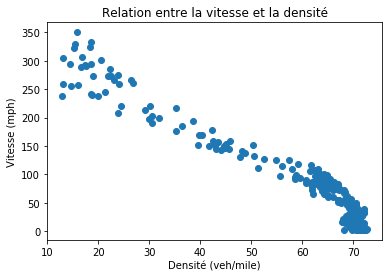

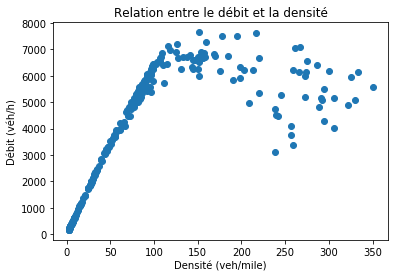

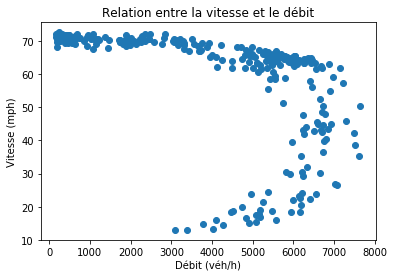

In [2]:
# Données de la station sélectionnée
dataSelectedStation = data.loc[data['Station'] == 400714] # Station choisie, avec 5 voies

speed   = dataSelectedStation.AvgSpeed     # mph
flow    = 12*dataSelectedStation.TotalFlow # veh/h
density = flow/speed                       # veh/mile

plt.scatter(speed, density)
plt.title('Relation entre la vitesse et la densité')
plt.xlabel('Densité (veh/mile)')
plt.ylabel('Vitesse (mph)')
plt.show()

plt.scatter(density, flow)
plt.title('Relation entre le débit et la densité')
plt.xlabel('Densité (veh/mile)')
plt.ylabel('Débit (véh/h)')
plt.show()

plt.scatter(flow, speed)
plt.title('Relation entre la vitesse et le débit')
plt.xlabel('Débit (véh/h)')
plt.ylabel('Vitesse (mph)')
plt.show()

In [3]:
# Greenshields model

# Déterminer l'équation de la droite
z = np.polyfit(density, speed, 1)

print("y=%.6fx+(%.6f)"%(z[0],z[1]))
print(z[0])
print(z[1])

y=-0.194934x+(76.480611)
-0.19493398816514654
76.48061058403476


In [4]:
# Paramètres à calibrer
U_0 = z[1]
K_j = -U_0/z[0]

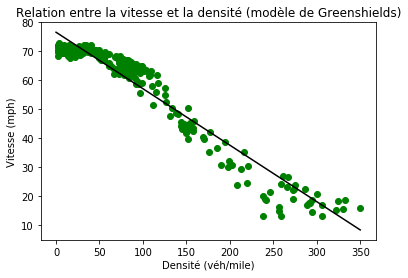

In [5]:
# Speed-Density relationship
K = np.arange(0.0, 350, 0.01)
U = U_0*(1 - K/K_j)

plt.scatter(density, speed, color='g')
plt.plot(K, U, color='k')
plt.title('Relation entre la vitesse et la densité (modèle de Greenshields)')
plt.xlabel('Densité (véh/mile)')
plt.ylabel('Vitesse (mph)')
plt.savefig('Donnees_produites/Figures/greenshields_v_k.eps', format='eps')
plt.show()

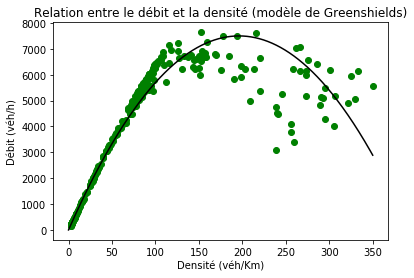

In [6]:
# Flow-Density relationship
q = K*U_0 - np.power(K,2)*U_0/K_j

plt.scatter(density, flow, color='g')
plt.plot(K, q, color='k')
plt.xlabel('Densité (véh/Km)')
plt.ylabel('Débit (véh/h)')
plt.title('Relation entre le débit et la densité (modèle de Greenshields)')
plt.savefig('Donnees_produites/Figures/greenshields_q_k.eps', format='eps')
plt.show()

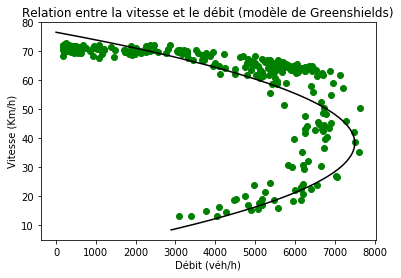

In [7]:
# Flow-Speed relationship
plt.scatter(flow, speed, color='g')
plt.plot(q, U, color='k')
plt.xlabel('Débit (véh/h)')
plt.ylabel('Vitesse (Km/h)')
plt.title('Relation entre la vitesse et le débit (modèle de Greenshields)')
plt.savefig('Donnees_produites/Figures/greenshields_v_q.eps', format='eps')
plt.show()

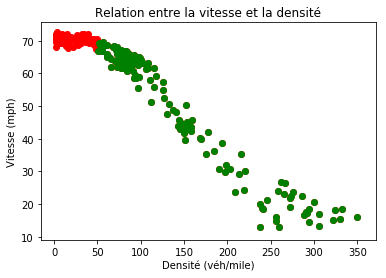

In [8]:
# Greenberg model

adaptedData = dataSelectedStation.loc[12*dataSelectedStation.TotalFlow/dataSelectedStation.AvgSpeed>50]

adaptedSpeed   = adaptedData.AvgSpeed     # mph
adaptedFlow    = 12*adaptedData.TotalFlow # veh/h
adaptedDensity = adaptedFlow/adaptedSpeed # veh/mile

plt.scatter(density, speed, color='r')
plt.scatter(adaptedDensity, adaptedSpeed, color='g')
plt.title('Relation entre la vitesse et la densité')
plt.xlabel('Densité (véh/mile)')
plt.ylabel('Vitesse (mph)')
plt.savefig('Donnees_produites/Figures/greenberg_choix.eps', format='eps')
plt.show()

In [9]:
# Déterminer l'équation logarithmique
z = np.polyfit(np.log(adaptedDensity), adaptedSpeed, 1)

print("y=%.6flog(x)+(%.6f)"%(z[0],z[1]))
print(z[0])
print(z[1])

y=-34.466193log(x)+(215.979414)
-34.46619303938929
215.97941438035627


In [10]:
# Paramètres à calibrer
U_c = -z[0]
K_j = np.exp(z[1]/U_c)

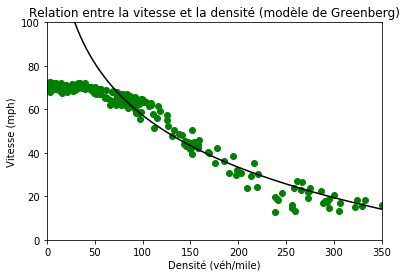

In [11]:
# Speed-Density relationship
K = np.arange(0.01, 350, 0.01)
U = U_c*np.log(K_j/K)

plt.scatter(density, speed, color='g')
plt.plot(K, U, color='k')
plt.title('Relation entre la vitesse et la densité (modèle de Greenberg)')
plt.xlabel('Densité (véh/mile)')
plt.ylabel('Vitesse (mph)')
plt.axis([0, np.max(density), 0, 100])
plt.savefig('Donnees_produites/Figures/greenberg_v_k.eps', format='eps')
plt.show()

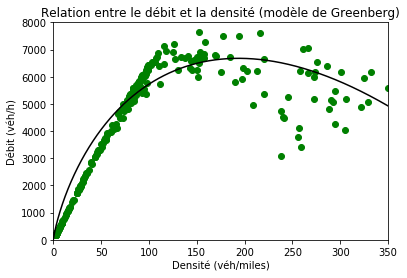

In [12]:
# Flow-Density relationship
q = U_c*K*np.log(K_j/K)

plt.scatter(density, flow, color='g')
plt.plot(K, q, color='k')
plt.xlabel('Densité (véh/miles)')
plt.ylabel('Débit (véh/h)')
plt.title('Relation entre le débit et la densité (modèle de Greenberg)')
plt.axis([0, np.max(density), 0, 8000])
plt.savefig('Donnees_produites/Figures/greenberg_q_k.eps', format='eps')
plt.show()

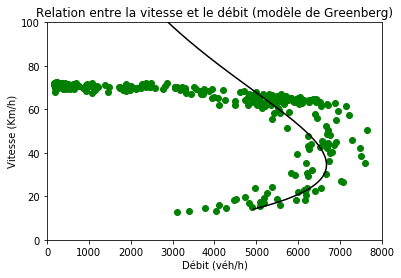

In [13]:
# Flow-Speed relationship
plt.scatter(flow, speed, color='g')
plt.plot(q, U, color='k')
plt.xlabel('Débit (véh/h)')
plt.ylabel('Vitesse (Km/h)')
plt.title('Relation entre la vitesse et le débit (modèle de Greenberg)')
plt.axis([0, 8000, 0, 100])
plt.savefig('Donnees_produites/Figures/greenberg_v_q.eps', format='eps')
plt.show()

In [14]:
# Exercice 2
occupancy = dataSelectedStation.AvgOccupancy

# Déterminer l'équation de la droite
x = density[:,np.newaxis]
z = np.linalg.lstsq(x, occupancy)[0][0]

print("τ = %.6f K"%(z))

τ = 0.001041 K


/home/etienne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


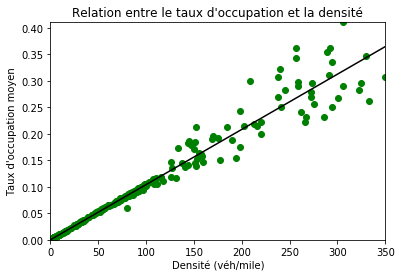

In [15]:
# Occupancy-Density relationship
K = np.arange(0.0, 350, 0.01)
t = z*K

plt.scatter(density, occupancy, color='g')
plt.plot(K, t, color='k')
plt.xlabel('Densité (véh/mile)')
plt.ylabel("Taux d'occupation moyen")
plt.title("Relation entre le taux d'occupation et la densité")
plt.axis([0, 350, 0, np.max(occupancy)])
plt.savefig('Donnees_produites/Figures/taux_occupation.eps', format='eps')
plt.show()